
    
(install a version compatible with your hardware)  
    


In [30]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### First a bit of (review?) Neural Network terminology:

## Logistic Regression

<img src="https://miro.medium.com/max/1433/1*rtRMr8B8aoZO44-rfDVnsw.png" width=1000>

Another way to visualize it...

<img src="https://qph.cf2.quoracdn.net/main-qimg-98dfd80df18bc6804ce919e73247562f-pjlq" width=1100>

The perceptron!

### Neural Networks (NN) for classification

NNs are computational learning systems that use a network of functions to translate input into output (make predictions). They are interconnected systems of **perceptrons**. Origin:
- brain (information processor) as a model (hierarchical representation of the visual cortex)
- information flows through **neurons**
- complex webs of interconnected neurons in the brain

 They consist of:

- input layer (the features used for classification)
- hidden layers (more hidden layers, deeper the network)
- output layer (might have multiple nodes for multi-category classification).
- every node in one layer is connected with every node in the next layer

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width="600"/>

Each non-input node (perceptron) creates an output by passing the weighted sum of its inputs through a non-linear activation function. This is the output of the node, which then becomes the input of another node in the next layer.


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*FcEfcrucAFymCr0gMFQ0QA@2x.png" width="400"/>


Each node outputs the following (b is called the bias, w are the weights, f is the activation function):
$$ f(b+\sum w_i x_i) $$

**Logistic regression as a perceptron**: 

- binary (0-1) response variable $y$
- several predictors $x_1$, $x_2$,...
- use a linear model for prediction: $b_0+b_1x_1+b_2x_2+...=b_0+\sum b_i x_i$
- number of parameters is 1 + number of predictors
- if p=P(Y=1), $$\log (\frac{\hat p}{1-\hat p})=b_0+\sum b_i x_i$$ 
- and so $$\hat p= \frac{1}{(1+e^{-(b_0+\sum b_i x_i)})}$$

### How many parameters does a NN have?

### Examples of activation functions f
(more here: https://en.wikipedia.org/wiki/Activation_function )

- Identity (what happens if we use this?): $$f(x)=x$$ 
- Rectified linear unit (ReLU): $$f(x)=\max(0,x)$$
- Sigmoid (logistic): $$f(x)=\frac{1}{1+e^{-x}}$$
- Step functions

## What kind of decision boundaries are we obtaining?

In the next few cells we assume that:
- we have two predictors $x_1$ and $x_2$
- $x_1$ and $x_2$ take values between 0 and 1

For random values of network parameters, we show the corresponding decision boundaries.


In [31]:
# for visualization - construct a grid of potential points for classifying
# same as in Lecture 12
x1 = np.array([])
x2 = np.array([])
for x in np.arange(0, 1, 0.01):
    for y in np.arange(0, 1, 0.01):
        x1 = np.append(x1, x)
        x2 = np.append(x2, y)
        
test_grid = pd.DataFrame(
        {"X1": x1,
         "X2": x2})
test_grid.shape

(10000, 2)

In [32]:
# activation functions

# ReLU: rectified linear function
def relu(x):
    return max(0, x)

# sigmoid
def sigmoid(x):
    return 1/(1+np.exp(x))

/tmp/ipykernel_2444/1045663233.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return sigmoid(p[0]+p[1]*x[0]+p[2]*x[1])


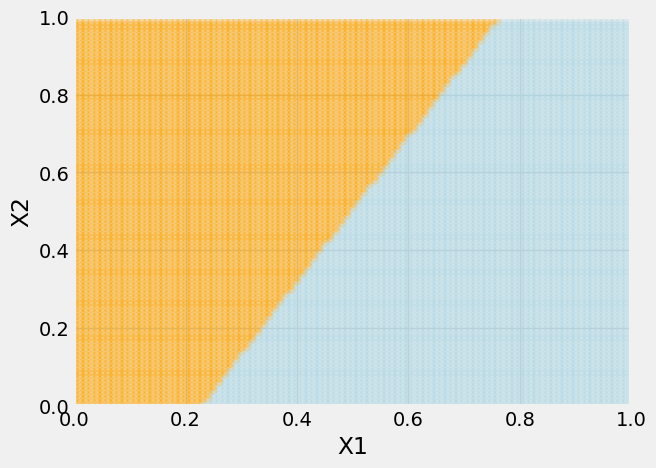

In [33]:
# logistic regression decision boundary

# parameters p chosen randomly
p= np.random.normal(loc=0,scale=10,size=3)

# the output for values of predictors x1 and x2 (x is an array of size 2) 
def output(x):
    return sigmoid(p[0]+p[1]*x[0]+p[2]*x[1])

# apply the output to all points on the grid
tmp=test_grid.apply(output,axis=1)

# the threshold for coloring is the median of tmp
plt.scatter(x1[tmp>np.median(tmp)],x2[tmp>np.median(tmp)], color='orange', alpha=0.3, s=30)
plt.scatter(x1[tmp<=np.median(tmp)],x2[tmp<=np.median(tmp)], color='lightblue', alpha=0.3, s=30)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0, 1)
plt.ylim(0, 1);

/tmp/ipykernel_2444/3038154962.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n1= sigmoid(p1[0]+p1[1]*x[0]+p1[2]*x[1])
/tmp/ipykernel_2444/3038154962.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n2= sigmoid(p2[0]+p2[1]*x[0]+p2[2]*x[1])
/tmp/ipykernel_2444/3038154962.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n3= sigmoid(p3[0]+p3[1]*x[0]+p3[2]*x[1])


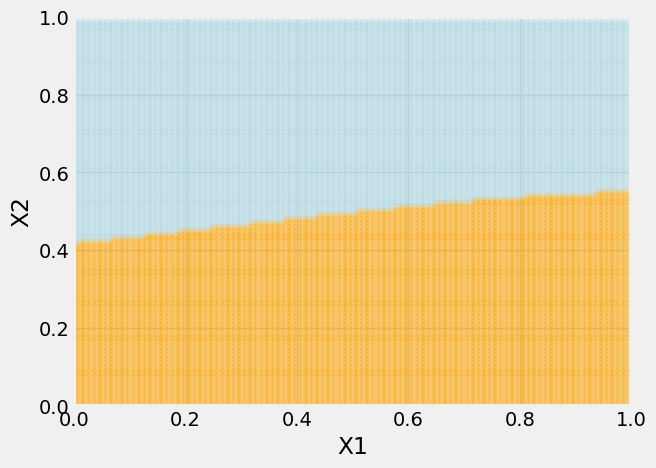

In [34]:
# run this several times

# a NN with 2 hidden layers, each with 3 nodes

# weights chosen randomly - how many parameters?
p1= np.random.normal(loc=2,scale=10,size=3)
p2= np.random.normal(loc=2,scale=10,size=3)
p3= np.random.normal(loc=2,scale=10,size=3)
p4= np.random.normal(scale=10,size=4)
p5= np.random.normal(scale=10,size=4)
p6= np.random.normal(scale=10,size=4)
p7= np.random.normal(scale=10,size=4)

# the output for values of predictors x1 and x2
def output2(x):
    # first node of the first layer
    n1= sigmoid(p1[0]+p1[1]*x[0]+p1[2]*x[1])
    
    # second node of the first layer
    n2= sigmoid(p2[0]+p2[1]*x[0]+p2[2]*x[1])
    
    # second node of the first layer
    n3= sigmoid(p3[0]+p3[1]*x[0]+p3[2]*x[1])
    
    # first node of the second layer - it uses the data from n1 and n2
    n4= sigmoid(p4[0]+p4[1]*n1+p4[2]*n2+p4[3]*n3)
    
    # second node of the second layer - 
    n5= sigmoid(p5[0]+p5[1]*n1+p5[2]*n2+p5[3]*n3)
    
    # third node of the second layer - 
    n6= sigmoid(p6[0]+p6[1]*n1+p6[2]*n2+p6[3]*n3)
    
    # output node
    return sigmoid(p7[0]+p7[1]*n4+p7[2]*n5+p7[3]*n6)

# apply the output to all points on the grid
tmp=test_grid.apply(output2,axis=1)

# the threshold for coloring is the median of tmp
plt.scatter(x1[tmp>np.median(tmp)],x2[tmp>np.median(tmp)], color='orange', alpha=0.3, s=30)
plt.scatter(x1[tmp<=np.median(tmp)],x2[tmp<=np.median(tmp)], color='lightblue', alpha=0.3, s=30)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0, 1)
plt.ylim(0, 1);


After seeing amateur drawings of decision boundaries, some professional stuff here:

https://playground.tensorflow.org

How well can you separate the data?

### Training a Neural Network - Key Concepts

|   |   |   |
|:--|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | **Forward Propagation** | The process of passing input data through the network to make predictions. Each neuron applies a mathematical operation (like matrix multiplication followed by an activation function). The final output is compared with the actual target value to compute the loss. |

|   |   |   |
|:--|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | **Back Propagation** | A technique used to adjust the weights of the network to reduce the loss. It involves computing the gradient (rate of change) of the loss with respect to each parameter. Uses the chain rule to efficiently propagate gradients backward through the network. |


|   |   |   |
|:--|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | **Epoch** | One complete pass of the entire dataset through the neural network. Each point gets passed forward, a loss is calculate, and the gradient update is propagated backward through the network. If we train for 10 epochs, the model sees the entire dataset 10 times.|

|   |   |   |
|:--|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | **Batches** | A subset of the dataset processed at one time. Instead of updating the model after every single data point (which is slow), we compute the loss and update weights after processing a batch of examples. |

|   |   |   |
|:--|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | **Mini-Batches/Mini-Batch Gradient Descent** | Instead of processing one data point at a time (slow) or the entire dataset at once (requires too much memory), we divide the data into mini-batches. Each mini-batch runs through forward propagation, computes loss, performs backpropagation, and updates weights.|

Example
- Dataset size: 10,000 images
- Batch size: 100
- Epochs: 5
- Total updates per epoch: 10,000÷100=100 weight updates
- Total updates after 5 epochs:5×100=500

Using batches makes training faster and more memory-efficient while still ensuring the model learns effectively.


### How to Choose Hidden Layers, Nodes, and Activation Functions

There is **no universal rule** for selecting the best **hidden layers, number of nodes, and activation functions**. However, these **best practices** can help:

#### Choosing the Number of Hidden Layers
| **Number of Hidden Layers** | **When to Use** | **Example Use Case** |
|-----------------|---------------------------|---------------------------|
| **0 (No Hidden Layers)** | Linear relationships only | Linear regression, logistic regression |
| **1 (Single Hidden Layer)** | Simple patterns | Basic neural networks (e.g., XOR classifier) |
| **2–3 Hidden Layers** | Most common for structured data | Tabular data (e.g., predicting house prices) |
| **4+ Hidden Layers** | Complex problems like image, text, speech processing | Deep learning models (CNNs, RNNs, Transformers) |

**Rule of Thumb**
- Start **small** (1–2 layers) and increase **if accuracy is low**.
- If increasing layers **doesn’t improve performance**, the model may be **too deep** for the data.

---

#### Choosing the Number of Nodes per Layer
The number of neurons in a layer affects **model capacity** and **overfitting risk**.

**Guidelines for Choosing Neurons**
1. **Start with a size between the input and output layers.**  
   - If you have **10 inputs** and **1 output**, try a hidden layer with **5–10 neurons** first.
2. **Use the "power of two" rule for exploration.**  
   - Try **8, 16, 32, 64, ...** and find the best performing architecture.
3. **Keep it balanced across layers.**  
   - Avoid large jumps in neurons across layers (e.g., 128 → 4 → 128).
4. **Use cross-validation to find the optimal number.**
   - Experiment with different sizes and see how validation accuracy changes.

**Rule of Thumb:**  
- Start with **2–3 times** the number of input features.  
- If model **underfits** (low accuracy), **increase neurons**.  
- If model **overfits** (good training but bad validation accuracy), **reduce neurons**.

---

#### Choosing the Right Activation Function**
The **activation function** decides how neurons process and pass information.  

**Common Activation Functions**

| **Activation** | **Formula** | **When to Use** | **Pros** | **Cons** |
|:---|:---|:---|:---|:---|
| **Sigmoid** | $\frac{1}{1 + e^{-x}}$ | **Output layer for binary classification** | Probabilistic interpretation | Can cause vanishing gradients |
| **ReLU** | $x$ if $x > 0$, else $0$ | **Hidden layers in most deep networks** | Avoids vanishing gradient | Can suffer from dead neurons (if $x \leq 0$) |
| **Leaky ReLU** | $x$ if $x > 0$, else $0.01x$ | **Fixes dead neurons in ReLU** | Allows small negative values | Still not ideal for all cases |
| **Tanh** | $\frac{e^x - e^{-x}}{e^x + e^{-x}}$ | **When inputs are centered around 0** | Avoids shifting weights too much | Can still suffer from vanishing gradients |
| **Softmax** | $\frac{e^{x_i}}{\sum e^{x_j}}$ | **Output layer for multi-class classification** | Outputs sum to 1 (probability) | Can be unstable for large inputs |


#### Let's walk through a simple example...

|   |   |
|:--|:--|
|<img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50" height=""> |Remember this data?|

In [35]:
fake_df = pd.DataFrame([[20, 100, 0],
                        [30, 130, 0],
                        [40, 150, 1],
                        [45, 140, 1],
                        [50, 110, 0],
                        [60, 140, 1],
                        [65, 120, 0],
                        [70, 110, 0],
                        [80, 130, 1],
                        [90, 120, 1]], columns=['Age', 'sysBP', 'HD'])
fake_df

,Age,sysBP,HD
0,20,100,0
1,30,130,0
2,40,150,1
3,45,140,1
4,50,110,0
5,60,140,1
6,65,120,0
7,70,110,0
8,80,130,1
9,90,120,1


We want to use `Age` and `sysBP` to predict `HD`. Imagine that we want to get predicted probabilities (between 0 and 1)

- There are two input nodes and one output node.

- I also decided that I want one hidden layer with 2 nodes.

How would you draw this network? What are the parameters that I need to estimate? What do I still need to choose?


Each connection has a weight and a bias, let's initialize them randomly. I'll set the biases to 0. The weights I've chosen (pseudo) randomly. [-1, 0.25, -0.5, 0.55, -0.47, 0.44]

Each node needs an activation function. For the output node, we will use the sigmoid function (Why?)

Let's use ReLU for the others.

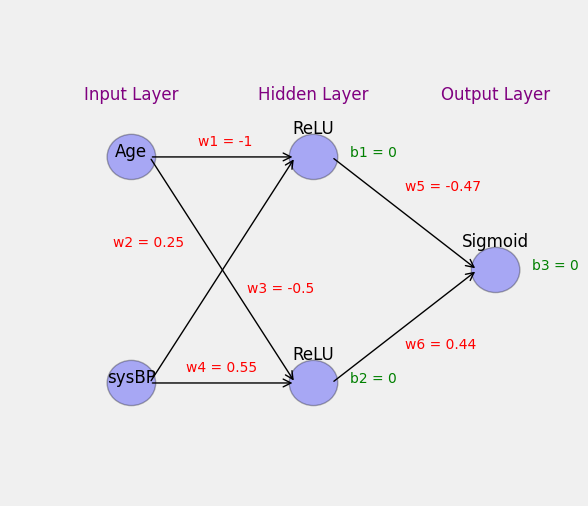

In [36]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-1, 3.3])
ax.set_ylim([-1, 3.3])
ax.axis("off")  # Hide axes

# Define neuron positions
input_neurons = [(0, 2), (0, 0)]  # (Age, sysBP)
hidden_neurons = [(1.5, 2), (1.5, 0)]  # Hidden layer (2 neurons)
output_neuron = [(3, 1)]  # Output neuron (HD probability)

# Draw neurons (lighter color for transparency)
for x, y in input_neurons + hidden_neurons + output_neuron:
    ax.add_patch(plt.Circle((x, y), 0.2, color="blue", ec="black", alpha=0.3, lw=1))

# Label neurons
ax.text(0, 2, "Age", fontsize=12, ha="center")
ax.text(0, 0, "sysBP", fontsize=12, ha="center")
ax.text(1.5, 2.2, "ReLU", fontsize=12, ha="center")
ax.text(1.5, 0.2, "ReLU", fontsize=12, ha="center")
ax.text(3, 1.2, "Sigmoid", fontsize=12, ha="center")

# Define weights with updated positions
weights = {
    ((0, 2), (1.5, 2)): ("w1 = -1", -0.2, 0.1),  # Shift text slightly
    ((0, 0), (1.5, 2)): ("w2 = 0.25", -0.9, 0.2),   # Adjust placement
    ((0, 2), (1.5, 0)): ("w3 = -0.5", 0.2, -0.2),
    ((0, 0), (1.5, 0)): ("w4 = 0.55", -0.3, 0.1),
    ((1.5, 2), (3, 1)): ("w5 = -0.47", 0, 0.2),
    ((1.5, 0), (3, 1)): ("w6 = 0.44", 0, -0.2)
}

# Draw arrows and label weights
for (x1, y1), (x2, y2) in weights.keys():
    ax.annotate("", xy=(x2 - 0.15, y2), xytext=(x1 + 0.15, y1),
                arrowprops=dict(arrowstyle="->", color="black", lw=1))
    weight_label, dx, dy = weights[((x1, y1), (x2, y2))]
    ax.text((x1 + x2) / 2 + dx, (y1 + y2) / 2 + dy, weight_label, fontsize=10, color="red")

# Label biases
for i, (x, y) in enumerate(hidden_neurons + output_neuron):
    ax.text(x + 0.3, y, f"b{i+1} = 0", fontsize=10, color="green")

# Layer labels
ax.text(0, 2.5, "Input Layer", fontsize=12, color="purple", ha="center")
ax.text(1.5, 2.5, "Hidden Layer", fontsize=12, color="purple", ha="center")
ax.text(3, 2.5, "Output Layer", fontsize=12, color="purple", ha="center")

plt.show()


#### Step 1: Given Data and Initial Weights
**Training Example:**
$$
\text{Age} = 20, \quad \text{sysBP} = 100, \quad \text{HD} = 0
$$

**Initial Weights and Biases**

| **From → To** | **Weight** |
|:------------|:-----------|
| Age → Hidden1 | w1 = -1.0 |
| sysBP → Hidden1 | w2 = 0.25 |
| Age → Hidden2 | w3 = -0.5 |
| sysBP → Hidden2 | w4 = 0.55 |
| Hidden1 → Output | w5 = -0.47 |
| Hidden2 → Output | w6 = 0.44 |
| Biases | b1 = 0, b2 = 0, b3 = 0 |



### Step 2: Forward Propagation
**Compute Hidden Layer Activations**

Each hidden neuron performs:
$$
z = (w_1 \cdot \text{Age}) + (w_2 \cdot \text{sysBP}) + b
$$
$$
h = \text{ReLU}(z) = \max(0, z)
$$

**Hidden Neuron 1:**
$$
z_1 = (-1.0 \times 20) + (0.25 \times 100) + 0
$$
$$
z_1 = -20 + 25 = 5.0
$$
$$
h_1 = \text{ReLU}(5.0) = 5.0
$$

**Hidden Neuron 2:**
$$
z_2 = (-0.5 \times 20) + (0.55 \times 100) + 0
$$
$$
z_2 = -10 + 55 = 45.0
$$
$$
h_2 = \text{ReLU}(45.0) = 45.0
$$

---

**Compute Output Layer Activation**

The output neuron computes:
$$
z_{\text{out}} = (w_5 \cdot h_1) + (w_6 \cdot h_2) + b_3
$$
$$
z_{\text{out}} = (-0.47 \times 5.0) + (0.44 \times 45.0) + 0
$$
$$
z_{\text{out}} = -2.35 + 19.8 = 17.45
$$

Then, apply the **Sigmoid activation function**:
$$
\hat{y} = \sigma(z_{\text{out}}) = \frac{1}{1 + e^{-17.45}}
$$

Since $ e^{-17.45} $ is very small, the output is **very close to 1**:
$$
\hat{y} \approx 0.9999997
$$

**Prediction**: The model predicts **HD = 1**, but the actual label is **HD = 0**.

### Step 3: Compute Loss
We use **Binary Cross Entropy Loss**:
$$
L = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

Since $ y = 0 $, the loss simplifies to:
$$
L = -\log(1 - \hat{y})
$$
$$
L = -\log(1 - 0.9999997)
$$

Using logarithms:
$$
L \approx -\log(0.0000003) = 15.01
$$

**High loss** because the model is very confident in the wrong prediction!

### Step 4: Backpropagation (Gradient Computation)
Now, we compute **gradients** step by step.

**Compute Gradient of Loss w.r.t. Output Neuron**
$$
\frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
$$
Since $ y = 0 $:
$$
\frac{\partial L}{\partial \hat{y}} = \frac{1}{1 - 0.9999997}
$$
$$
= \frac{1}{0.0000003} = 3333333.3
$$

**Compute Gradient of Output Neuron w.r.t. $ z_{\text{out}} $**
$$
\frac{\partial \hat{y}}{\partial z_{\text{out}}} = \hat{y} (1 - \hat{y}) = 0.9999997 \times (1 - 0.9999997) = 0.0000003
$$

**Compute Gradient of Loss w.r.t. $ z_{\text{out}} $**
Using chain rule:
$$
\frac{\partial L}{\partial z_{\text{out}}} = \frac{\partial L}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial z_{\text{out}}}
$$
$$
= 3333333.3 \times 0.0000003 = 1.0
$$

**Compute Gradients for Output Layer Weights and Bias**
$$
\frac{\partial L}{\partial w_5} = 1.0 \times h_1 = 1.0 \times 5.0 = 5.0
$$
$$
\frac{\partial L}{\partial w_6} = 1.0 \times h_2 = 1.0 \times 45.0 = 45.0
$$
$$
\frac{\partial L}{\partial b_3} = 1.0
$$

**Compute Gradients for Hidden Layer Weights and Biases**
Since:
$$
\frac{\partial L}{\partial h_1} = 1.0 \times w_5 = -0.47
$$
$$
\frac{\partial L}{\partial h_2} = 1.0 \times w_6 = 0.44
$$

We propagate to inputs:
$$
\frac{\partial L}{\partial w_1} = (-0.47) \times 20 = -9.4
$$
$$
\frac{\partial L}{\partial w_2} = (-0.47) \times 100 = -47
$$
$$
\frac{\partial L}{\partial w_3} = (0.44) \times 20 = 8.8
$$
$$
\frac{\partial L}{\partial w_4} = (0.44) \times 100 = 44
$$
$$
\frac{\partial L}{\partial b_1} = -0.47, \quad \frac{\partial L}{\partial b_2} = 0.44
$$


### Step 5: Update Weights (Gradient Descent)
Using **learning rate** $ \eta = 0.01 $:

$$
w_1 = -1.0 - 0.01(-9.4) = -0.906
$$
$$
w_2 = 0.25 - 0.01(-47) = 0.72
$$
$$
w_3 = -0.5 - 0.01(8.8) = -0.588
$$
$$
w_4 = 0.55 - 0.01(44) = 0.11
$$
$$
w_5 = -0.47 - 0.01(5) = -0.52
$$
$$
w_6 = 0.44 - 0.01(45) = -0.01
$$
$$
b_1 = 0 - 0.01(-0.47) = 0.0047
$$
$$
b_2 = 0 - 0.01(0.44) = -0.0044
$$
$$
b_3 = 0 - 0.01(1.0) = -0.01
$$


Imagine having to do this for 100s of neurons and 1000s of training data points....

Matrix operations make this much more efficient! In Pytorch, we use tensors:

### What are Tensors?

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | A **tensor** is a generalization of scalars, vectors, and matrices to higher dimensions. In PyTorch, tensors are the fundamental data structure used for computations. |

Pytorch tensors are optimized for deep learning, making them essential for efficient computation.


### Brief intro to pytorch tensors 

At first glance, tensor look like numpy arrays:

* $0d$ (scalar), $1d$, $2d$, ...
* All elements must be of the **same data type**. 
* Can be initialized in [all sorts of ways](https://pytorch.org/docs/stable/tensors.html).
* By default, created on the CPU (but can be moved to a GPU). 

In [37]:
tensor_1d = torch.rand(4)
print(tensor_1d)
print('    Shape: ', tensor_1d.shape)
print('     Type: ', tensor_1d.dtype)

print() 

tensor_2d = torch.zeros(2,2, dtype=torch.int32)
print(tensor_2d)
print('    Shape: ', tensor_2d.shape)
print('     Type: ', tensor_2d.dtype)



tensor([0.9132, 0.0553, 0.1486, 0.4359])
    Shape:  torch.Size([4])
     Type:  torch.float32

tensor([[0, 0],
        [0, 0]], dtype=torch.int32)
    Shape:  torch.Size([2, 2])
     Type:  torch.int32


* Slicing works similar to arrays

#### Note: 

A $0d$ (or any other) slice of a tensor is still a tensor. 

To get the element as a, say, float use `.item()`  

In [38]:
t1 = torch.rand(2,2)
t2 = torch.eye(2) # identity tensor 

print('First column of t1: ', t1[:,0])
print('Second row of t1: ', t1[1,:], '\n\n')

print(t1[0,0] , t1[0,0].item())

# BTW, this can be a bit confusing: 
print(t1[0,0] == t1[0,0].item()) # checks if the values are equal
print(t1[0,0] is t1[0,0].item()) # checks if the two point to the
                                 # same object! 
    

First column of t1:  tensor([0.2546, 0.9625])
Second row of t1:  tensor([0.9625, 0.4736]) 


tensor(0.2546) 0.2546488046646118
tensor(True)
False


#### Tensors can be converted to numpy arrays. 

In [39]:
torch.eye(3).numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

* If the tensor is on the CPU, the array converted from the tensor will **share memory**
* But they are not the same object - the tensor object is larger, has different functionality, and can store information that the array does not have).  

In [40]:
t2 = torch.eye(2) # identity tensor 

ndarray = t2.numpy()
print('A numpy array converted from a tensor:')
print(ndarray, type(ndarray), '\n')

######################################################
# Careful!                                           #
# If the tensor is on the CPU (rather than GPU)      #
# the two objects share the same memory location:    #
######################################################

print('Changing the first element of the tensor...')
t2[0,0] = 7
print('... changes the numpy array:')
print(t2, '\n', ndarray, '\n')

print('Changing the last element of the numpy array...')
ndarray[1,1] = 3
print('... changes the tensor:')
print(t2, '\n', ndarray, '\n')

print('But are they the same object?')
t2 is ndarray # but are not the same object...


A numpy array converted from a tensor:
[[1. 0.]
 [0. 1.]] <class 'numpy.ndarray'> 

Changing the first element of the tensor...
... changes the numpy array:
tensor([[7., 0.],
        [0., 1.]]) 
 [[7. 0.]
 [0. 1.]] 

Changing the last element of the numpy array...
... changes the tensor:
tensor([[7., 0.],
        [0., 3.]]) 
 [[7. 0.]
 [0. 3.]] 

But are they the same object?


False

#### A tensor can keep track of the gradient from optimization steps 

`requires_grad=True` will create a tensor where gradients are calculated when it is operated on (for optimization purposes) and stored as a [computational graph](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/) alongside with the tensor values.  

This is used for tensors that store **model parameters that need to be optimzed**.  

For a tensor with gradients to be **converted** to a numpy array it needs to be `detach`ed from the gradients first. 

In [41]:
parameters_w_grad = torch.rand(3,3, requires_grad=True)
print(parameters_w_grad)

try:
    parameters_w_grad.numpy()
except Exception as e:
    print(e)

tensor([[0.5951, 0.3713, 0.6769],
        [0.3823, 0.4698, 0.6673],
        [0.9802, 0.1590, 0.0536]], requires_grad=True)
Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.


In [42]:
print(parameters_w_grad.detach().numpy())

[[0.59507513 0.37129515 0.6768956 ]
 [0.38228202 0.46979177 0.6673128 ]
 [0.98021597 0.15895307 0.05361605]]


#### Like arrays, tensors can be added (element by element) and multiplied (element by element or matmul)



In [43]:
t1 = torch.rand(2,3,4,5)
t1.view(-1, 2).shape
# t2 = torch.rand(5,7)

# t1 @ t2

torch.Size([60, 2])

In [44]:
t1 = torch.rand(2,2)
t2 = torch.eye(2) # identity tensor 

print('Two tensors:')
print(t1, '\n\n', t2, '\n')
print('Addition (element by element):\n', t1+t2, '\n')
print('Multiplication element by element:\n', t1*t2, '\n')
print('Matrix multiplication:\n', t1@t2 )


Two tensors:
tensor([[0.2241, 0.6714],
        [0.5003, 0.4475]]) 

 tensor([[1., 0.],
        [0., 1.]]) 

Addition (element by element):
 tensor([[1.2241, 0.6714],
        [0.5003, 1.4475]]) 

Multiplication element by element:
 tensor([[0.2241, 0.0000],
        [0.0000, 0.4475]]) 

Matrix multiplication:
 tensor([[0.2241, 0.6714],
        [0.5003, 0.4475]])


#### Reshaping tensors with [`view()`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)

If it appears, `-1` dimension is inferred from the other dimnensions of the tensor. 

In [45]:
t2 = torch.eye(2)+7 # identity tensor 

print('A 2x2 tensor flattened to a 1d row with 4 elements:')
print(t2.view(4),
      t2.view(4).shape, '\n') # four elements in a row

print('A 2x2 tensor reshaped to a 4x1 tensor - #rows inferred:')
print(t2.view(-1,1),
      t2.view(-1,1).shape, '\n') # One column, infer number of rows

print('A 2x2 tensor reshaped to a 1x4 tensor - #columns inferred:')
print(t2.view(1,-1),
      t2.view(1,-1).shape, '\n') # On row, infer number of columns

print('A 2x2 tensor flattened to a 1d row - #columns inferred:')
print(t2.view(-1),
      t2.view(-1).shape, '\n') # inferred number of elements in a row


A 2x2 tensor flattened to a 1d row with 4 elements:
tensor([8., 7., 7., 8.]) torch.Size([4]) 

A 2x2 tensor reshaped to a 4x1 tensor - #rows inferred:
tensor([[8.],
        [7.],
        [7.],
        [8.]]) torch.Size([4, 1]) 

A 2x2 tensor reshaped to a 1x4 tensor - #columns inferred:
tensor([[8., 7., 7., 8.]]) torch.Size([1, 4]) 

A 2x2 tensor flattened to a 1d row - #columns inferred:
tensor([8., 7., 7., 8.]) torch.Size([4]) 



#### Moving tensor to a GPU 

On some M1, M2, and M3 Macbooks, the MPS frameworks supports working with GPU.   

In that case, device='mps'. 

In [46]:
if torch.cuda.is_available(): 
    device = 'cuda'
else: 
    device = 'cpu'
    
print(device) 
    
t1 = torch.rand(2,2)
t1.to(device) # Move to GPU if available   
# OR 
t1 = torch.rand(2,2, device=device) # Create on GPU if available



cuda


(An Aside on GPUs)

### Why do we need GPUs?

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50" height=""> | A **Graphics Processing Unit (GPU)** is a specialized processor designed for parallel computation.
Unlike CPUs, which handle a few tasks at high speed, GPUs can perform thousands of operations simultaneously. |



- CPUs are designed for tasks that require a lot of logical thinking and quick switching between different tasks (e.g., running programs, browsing the web, or managing files).

- GPUs are designed for tasks that require performing the same type of calculation over and over again on lots of data at once (e.g., rendering images in video games or processing large amounts of numbers in machine learning).

### Why Move a Tensor to a GPU?

- Massive Parallelization: Deep learning models require matrix operations on large datasets. GPUs can handle these operations in parallel, making them significantly faster.

- Optimized Hardware: GPUs have thousands of cores optimized for vector and matrix calculations, essential for deep learning.

- Training Efficiency: A CPU might take hours or days for complex models, while a GPU can reduce this time significantly.


#### All Computers Have a CPU
- Desktops, laptops, smartphones, ...
- The "brain" of the computer
- Handles everyday tasks (running programs, browsing the web, managing files,...)

#### Not All Computers Have a Powerful GPU
- Most computers have some form of GPU, but not all of them have a powerful, dedicated GPU
    - Integrated GPUs (Basic Graphics)
        - Found in most laptops, budget desktops, and even smartphones.
        - Built inside the CPU and shares memory (RAM) with the rest of the system.
        - Good enough for watching videos, basic gaming, and displaying images.
    - Dedicated GPUs (Powerful Graphics)
        - Separate physical hardware with its own memory (VRAM).
        - Designed for heavy workloads like gaming, video editing, and deep learning.
        - Found in gaming PCs, workstations, and high-end laptops.

#### Do You Need a Dedicated GPU for PyTorch?

No, PyTorch can run on a CPU, but it will be much slower for deep learning.

If you're working with big neural networks (like image recognition or natural language processing), a dedicated GPU (like an NVIDIA GPU with CUDA support) will significantly speed up training.

If your computer only has an integrated GPU, it likely won’t provide much speed-up for deep learning.

(Ok, now back to Pytorch)

#### How to know if you have a dedicated GPU?

You can ask Pytorch!

Run the code below:
- If it prints True and shows a GPU name (like "NVIDIA GeForce RTX 3060"), you have a dedicated GPU.
- If it prints False, your computer doesn’t have a usable GPU for PyTorch.

In [47]:
print(torch.cuda.is_available())  # Returns True if a GPU is available
print(torch.cuda.device_count())  # Number of GPUs detected
print(torch.cuda.get_device_name(0))  # Name of the first GPU

True
1
NVIDIA GeForce GTX 1050 Ti with Max-Q Design


### Brief intro to pytorch `autograd`

* Calculating gradients of loss functions using the chain rule is necessary for figuring out the contribution of the parameters to errors. 

$\rightarrow$ Optimizing model parameters (typically) requires calculating gradients of loss functions using the chain rule.  

* The `autograd` module performs these calculations and makes the results available to the optimizer by constructing a [computational graph](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/). 

* The calculations are performed 'under the hood' - they do not have to be implemented explicitly for every model. 

#### Simple example

All operations on the tensor `x` will be tracked on an operational graph. 


In [48]:
x = torch.tensor([1/2, 1/2, 1/2, 1/2], requires_grad=True)
print('x:', x) 
print('x.grad: ', x.grad)
print()

print('First forward pass with three operations')
print('    Note that the operations result in a scalar:\n')
f_of_x = x**2
print('f(x) = x**2:', f_of_x) 
print('f(x).grad_fn: ', f_of_x.grad_fn) # 'Pow' stands for 
                                        # power operation
print('x.grad: ', x.grad)
print()

g_of_x = 4*f_of_x
print('g(x) = 4*[f(x)]:', g_of_x) 
print('g(x).grad_fn: ', g_of_x.grad_fn) # 'Mul' stands for 
                                        # multiplication operation
print('x.grad: ', x.grad)
print()

h_of_x = g_of_x @ g_of_x
print('h(x) = g(x).g(x):', h_of_x) 
print(h_of_x.grad_fn) # 'Dot' stands for dot product operation
print('x.grad: ', x.grad)
print()

print('\n Performing the first backward pass')
h_of_x.backward() # By default, the previous computational  
                  # graph is released
print('x.grad = dh/dx: ', x.grad) # These values can inform an 
                                  # optimizer how to adjust x. 
                                  # Of course, typically the gradient
                                  # is calculated for a loss function 
                                  # and not for arbitrary operations. 
print('(the first computational graph was released.)\n\n')

print('Second forward pass with the same three operations:\n')
f_of_x = x**2
print('f(x) = x**2:', f_of_x) 
print('x.grad: ', x.grad)
print()

g_of_x = 4*f_of_x
print('g(x) = 4*[f(x)]:', g_of_x) 
print('x.grad: ', x.grad)
print()

h_of_x = g_of_x @ g_of_x
print('h(x) = g(x).g(x):', h_of_x) 
print('x.grad: ', x.grad)
print()

##################################################
# The .backward() method calculates the gradient #
##################################################

print('\n Performing the second backward pass')
h_of_x.backward() # Calculate the gradient
print('Accumulated x.grad = dh/dx: ', x.grad) # By default, the dh/dx 
                                              # are accumulated!
print('(the second computational graph was released.)\n\n')


x: tensor([0.5000, 0.5000, 0.5000, 0.5000], requires_grad=True)
x.grad:  None

First forward pass with three operations
    Note that the operations result in a scalar:

f(x) = x**2: tensor([0.2500, 0.2500, 0.2500, 0.2500], grad_fn=<PowBackward0>)
f(x).grad_fn:  <PowBackward0 object at 0x7f064f7d0610>
x.grad:  None

g(x) = 4*[f(x)]: tensor([1., 1., 1., 1.], grad_fn=<MulBackward0>)
g(x).grad_fn:  <MulBackward0 object at 0x7f0651c30ee0>
x.grad:  None

h(x) = g(x).g(x): tensor(4., grad_fn=<DotBackward0>)
x.grad:  None


 Performing the first backward pass
x.grad = dh/dx:  tensor([8., 8., 8., 8.])
(the first computational graph was released.)


Second forward pass with the same three operations:

f(x) = x**2: tensor([0.2500, 0.2500, 0.2500, 0.2500], grad_fn=<PowBackward0>)
x.grad:  tensor([8., 8., 8., 8.])

g(x) = 4*[f(x)]: tensor([1., 1., 1., 1.], grad_fn=<MulBackward0>)
x.grad:  tensor([8., 8., 8., 8.])

h(x) = g(x).g(x): tensor(4., grad_fn=<DotBackward0>)
x.grad:  tensor([8., 8., 8., 8.

#### Why is all this information computed and stored? 

Well...

Just in case:
* The tensor in question holds model parameters (**weights**). 
* The operations performed on the tensor calculated a **loss function**. 
    
In that case, parameters will need to be gradually improved (**optimized**) and the gradients come in handy (GD).   



### Example: linear regression with the Galton dataset

The Galton dataset contains information on $\sim 1000$ individuals that include their hights and their parents' heights. 


In [49]:
galton = pd.read_csv('../Data/galton.csv')
print('No. of records is: %d'%len(galton))
galton.dropna(inplace=True)
print('No. of records after dropping missing data is: %d'%len(galton))
galton.head()


FileNotFoundError: [Errno 2] No such file or directory: '../Data/galton.csv'

#### The linear regression model: 

$$

\text{ Child Height } = \beta_1 \times \text{ Mid Parents Height }

$$

<br> 

* On predictor
* One weight/parameter 
* No intercept/bias

Before training:
    Linear coef = 0.05
    Parent height=74.00 , predicted child height=3.94


After training:
    Linear coef = 0.96
    Parent height=74.00 , predicted child height=70.92


On average, parents in the dataset were
taller than their children by 2.46"


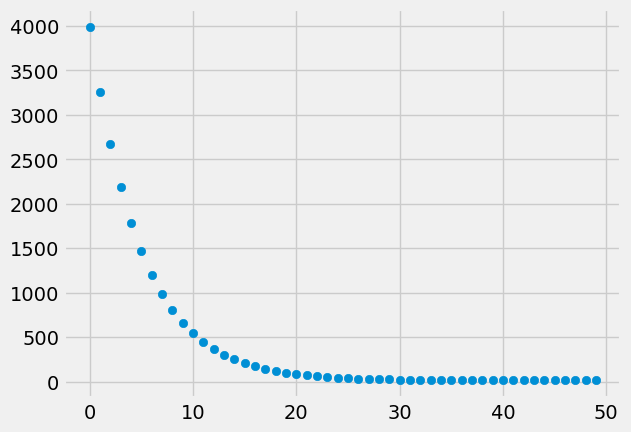

In [ ]:
x = torch.tensor([galton.midparentHeight])
y = torch.tensor(galton.childHeight)

w = torch.rand(1, requires_grad=True) # single weight/parameter

def forward(x):
    return w*x # Introducing a bias would require a 'data row' of 1s. 
               # For simplicity, our model will assume 0 bias. 

def MSE(y, y_hat): 
    return ((y-y_hat)**2).mean()

parentsHeightTest = 74.00

y_hat = forward(parentsHeightTest)
print('Before training:')
print('    Linear coef = %.2f'%(w.item()))
print('    Parent height=%.2f , predicted child height=%.2f\n\n'%\
      (parentsHeightTest, y_hat))

#############################################################
learning_rate = 1e-5 # (try 1e-3 to see what might happen...)
n_epochs = 50 
#############################################################

losses = []
for epoch in range(n_epochs):

    y_hat = forward(x)   # forward pass -> current prediction
    loss = MSE(y, y_hat) # calculate loss
    losses.append(loss.item())
    loss.backward()      # backward pass -> calculate gradient
    
    with torch.no_grad():  
        w -= learning_rate * w.grad # update weight using 
                                    # gradient descent
     
    w.grad.zero_() # avoid accumulating these grads into next epoch
    
plt.scatter(range(n_epochs), losses)

y_hat = forward(parentsHeightTest)    
print('After training:')
print('    Linear coef = %.2f'%(w.item()))
print('    Parent height=%.2f , predicted child height=%.2f\n\n'%\
      (parentsHeightTest, y_hat))

deltaHeight = (galton.midparentHeight - galton.childHeight).mean()
print('On average, parents in the dataset were')
print('taller than their children by %.2f"'%deltaHeight)


### Same example using a built-in loss function and an optimizer

####  Design the model
* Inherit from `torch.nn` basic methods and attributes for Neural Network models 
* Input shape (`torch.nn` models expect features in columns and samples in rows, like a DataFrame)
* Forward pass 
* Output shape

#### Choose the loss function 
* Here - built in MSE instead of our implementaiton

#### Choose the optimizer
* Here - [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) instead of our implementation of the gradient descent learning rule.

[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) is another popular one. 


#### Train the model (for each epoch)
* Forward pass: calculate predictions and loss
* Backward pass: calculate gradients 
* Optimizer step: update model parameters (weights) 

<br/> 


**Recall:**

By default, PyTorch accumulates the gradients on subsequent backward passes. 

During training with every batch the gradients need to be explicitly set to zero using `optimizer.zero_grad()` before starting the backpropagation. 

The accumulating behavior can be convenient when we want to compute the gradient of the loss summed over multiple batches (or with RNNs).






Before training:
    Parent height=74.00
    Predicted child height=-48.16


After training:
    Parent height=74.00
    Predicted child height=70.56


Model parameter 0: 0.95
Model parameter 1: 0.32


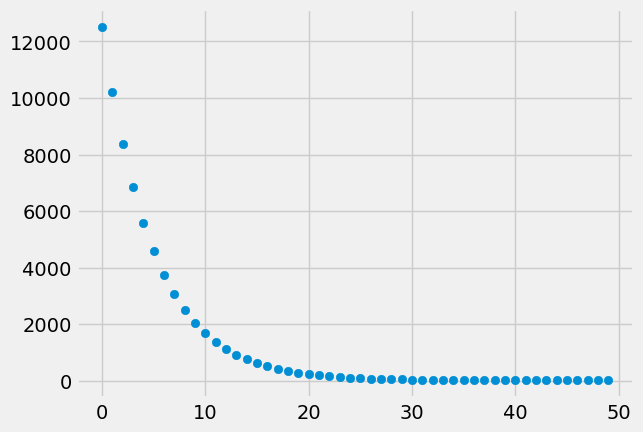

In [17]:
import torch.nn as nn # Neural Networks module

########################################################
# torch.nn models expect the features to be in columns #
#                        and samples to be in rows     #
########################################################

X = torch.tensor(galton.midparentHeight, 
                 dtype=torch.float32).view(-1,1)
Y = torch.tensor(galton.childHeight, 
                 dtype=torch.float32).view(-1,1)

n_samples, n_features = X.shape # 934 samples, single feature 


######################################################
# Define the model:                                  #
#    - Inherit from the basic Neural Networks class  #
#    - Define layers in the constructor              #
#    - Apply layers in the forward pass              # 
######################################################

class OurLR(nn.Module): # inherit from torch.nn.Module 

    def __init__(self, in_dim, out_dim): # constructor
        super().__init__() # parent constructor
        self.layer1 = nn.Linear(in_dim, out_dim) # one linear layer: 
                                                 # weights + bias
                                  # If there were more layers in the 
                                  # neural network they could be 
                                  # defined here
        
    def forward(self, x): 
        return self.layer1(x) 

###################################
# Create an instance of the model #   
###################################

in_dim, out_dim = n_features, n_features # One input, one output
model = OurLR(in_dim, out_dim)

                  ########
                  # bias #
                  ########
#                    | 
######  * weight     V        #######
# in # ---------->   + -----> # out #
######                        #######

parentsHeightTest = torch.tensor([74.00])
y_hat = model(parentsHeightTest)
print('Before training:')
print('    Parent height=%.2f'%parentsHeightTest)
print('    Predicted child height=%.2f\n\n'%y_hat)


######################################################
# Define learning rate, loss function, and optimizer #
######################################################
learning_rate = 1e-5 
n_epochs = 50 
loss_fun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=learning_rate) # parameters = weight

###################
# Train the model #
###################
losses = []
for epoch in range(n_epochs):

    y_hat = model(X)   # forward pass -> current prediction
    loss = loss_fun(Y, y_hat) # calculate loss
    loss.backward()      # backward pass -> calculate gradient
    losses.append(loss.item())
    
    optimizer.step() # update weight using stochastic gradient descent
    optimizer.zero_grad() # zero the gradient so it does not accumulate
    
plt.scatter(range(n_epochs), losses)

###################
# Test the model  #
###################
y_hat = model(parentsHeightTest)    
print('After training:')
print('    Parent height=%.2f'%parentsHeightTest)
print('    Predicted child height=%.2f\n\n'%y_hat)

for count, param in enumerate(model.parameters()):
    print('Model parameter %d: %.2f'%(count, param.item()))
    

### Building a simple linear neural network using pytorch

### Goal: to classify images of hand written digits to $10$ classes: $0, 1, 2, \dots , 9$

We'll use a subset of the MNIST datases: 

$28 \times 28$ greyscale images of hand written digits. 


<br/>

<br/>


Same pipeline as before: 

####  Design the model
* Inherit from `torch.nn` + Input/output shapes:
    * Input $=$ image size $= 28 \times 28 = 784$
    * Output $=$ number of classes = $10$ <br/> Each output will be treated as a **'likelihood'** and the maximal one will determine the class.
* Forward pass: layers and [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) 

#### Choose the [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions) 

#### Choose the [optimizer](https://pytorch.org/docs/stable/optim.html)

#### Train the model (for each epoch, for each batch)
* Forward pass: calculate predictions and loss
* Backward pass: calculate gradients 
* Optimizer step: update model parameters



In [18]:
import torch
import torch.nn as nn 
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

* Here, we will use the `MNIST` dataset from `torchvision.datasets`, which is already divided to training and testing sets. 

* Any set of images can be loaded with the (generic) dataloader provided that it is organized appropriately: 

[`torchvision.datasets.ImageFolder`](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html) is a data loader for images arranged in subfolders by class. E.g.: 

`root/dog/xxx.png` <br/>
`root/dog/xxy.png` <br/>
`root/dog/[...]/xxz.png` <br/>

<br/> 

`root/cat/123.png` <br/>
`root/cat/nsdf3.png` <br/>
`root/cat/[...]/asd932_.png` <br/>


In [19]:
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

#########################
# Some hyper parameters # 
#########################

in_dim = 28*28 
out_dim = 10 # there are 10 distinct digits (classes)
hidden_dim = 300
n_epochs = 5 
batch_size = 100 
learning_rate = 1e-3 

# If unclear - draw the model 
# (although not every neuron in the hidden layer)


####################################################################
# Set up using torchvision.transforms for preprocessing each image #   
####################################################################

img_transform = transforms.Compose([
    transforms.ToTensor(), # instead of grayscale - values from 0..255 to 0..1
    transforms.Normalize([0.5], [0.5]) # shift to center at 0
])


################################################
#        Load data from a local folder         #
#   (some sources have naming discrepancies)   #
################################################

X_train = MNIST('data/MNIST', train=True, transform=img_transform, 
                download=True)
X_test = MNIST('data/MNIST', train=False, transform=img_transform)


#############################
# Specify the dataloader(s) # 
#############################

loader_train = DataLoader(dataset=X_train, batch_size=batch_size, 
                          shuffle=True)
loader_test = DataLoader(dataset=X_test, batch_size=batch_size, 
                         shuffle=False)


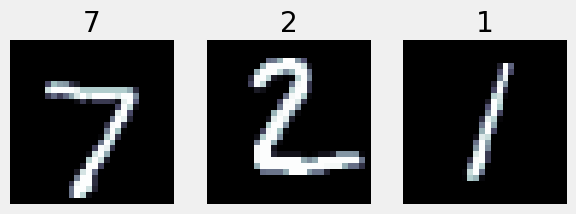

In [20]:
########################################
# Show a few example images and labels #
########################################

imgs, lbls = next(iter(loader_test)) # one batch
for i in range(3): 
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i][0], cmap='bone')
    plt.title(lbls[i].item())
    plt.axis('off')


#### A fully connected linear network with one hidden layer: 

In [21]:
##########################################
# Specify the model class (model design) #
##########################################

class SimpleLinearNN(nn.Module): 
    
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__() # inherited constructor
        self.layer_1 = nn.Linear(in_dim, hidden_dim)
        self.relu = nn.ReLU() # Rectifier Linear Unit 
                              # activation function 
        self.layer_2 = nn.Linear(hidden_dim, out_dim)
        
    def forward(self, x): 
        output = self.layer_1(x)
        output = self.relu(output)
        output = self.layer_2(output)
        # No final activation function: 
        #    the loss function will expect 
        #    the unnormalized numbers (logits without an activation function) as input
        return output
    
    
###################################
# Create an instance of the model #
###################################

model = SimpleLinearNN(in_dim, hidden_dim, out_dim)


######################################
# Define loss function and optimizer # 
######################################

loss_fun = nn.CrossEntropyLoss() # A loss function that expects 
                                 # unnormalized input  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


### Training the simple linear neural network using pytorch


In [22]:
%%time 

###################
# Train the model # 
###################

losses = [] 
for epoch in range(n_epochs): 
    for k, (imgs, lbls) in enumerate(loader_train): 
        
        # Forward pass and loss
        imgs = imgs.view(-1, 28*28) # each row will contain one 
                                    # 'flattened' image from batch
        network_outputs = model(imgs) # one prediction per image 
                                      # from the batch
        loss = loss_fun(network_outputs, lbls) # compare predictions 
                                               # and labels
        
        # Backward pass and parameter adjustment
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # so as not to accumulate grads 
                              # between batches
        
        # Indicate progress
        if k%200 == 0: 
            print('Epoch %d, batch %d: loss = %.3f'%\
                  (epoch, k, loss.item()))
        losses.append(loss)
        



Epoch 0, batch 0: loss = 2.373
Epoch 0, batch 200: loss = 0.264
Epoch 0, batch 400: loss = 0.280
Epoch 1, batch 0: loss = 0.215
Epoch 1, batch 200: loss = 0.136
Epoch 1, batch 400: loss = 0.056
Epoch 2, batch 0: loss = 0.254
Epoch 2, batch 200: loss = 0.057
Epoch 2, batch 400: loss = 0.185
Epoch 3, batch 0: loss = 0.109
Epoch 3, batch 200: loss = 0.127
Epoch 3, batch 400: loss = 0.138
Epoch 4, batch 0: loss = 0.034
Epoch 4, batch 200: loss = 0.093
Epoch 4, batch 400: loss = 0.038
CPU times: user 38.5 s, sys: 1min 49s, total: 2min 28s
Wall time: 10.9 s


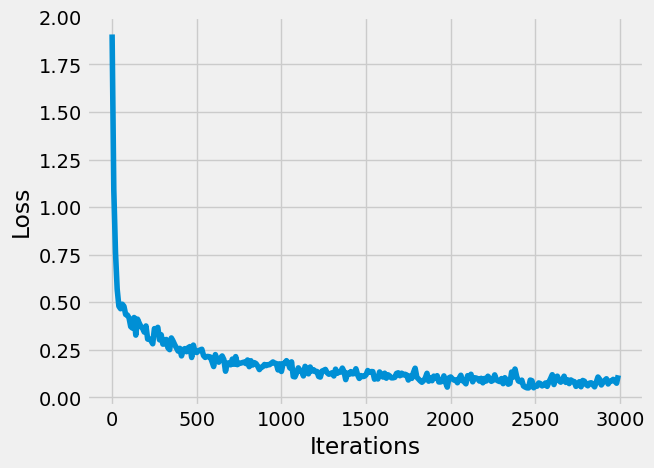

In [23]:
##########################
# Plot (smoothed) losses #
##########################

win = 10

losses_values = [x.detach().numpy() for x in losses] # remove the computational graph from each tensor
losses_values = np.convolve(losses_values, np.ones(win), 'valid') / win # rolling window average
iters = np.array(range(len(losses_values)))
losses_values = losses_values[::win]
iters = iters[::win] 

plt.figure()
plt.plot(iters, losses_values) 
plt.xlabel('Iterations')
plt.ylabel('Loss');



### Testing the simple linear neural network using pytorch

**Note (I):**
After training we do not need the gradient calculations to be performed so we can 
* `.detach()` (creates a new copy of the tensor) or 
* set `.requires_grad_(False)` (sets the flag in place) or 
* use `with torch.no_grad():` (skips the calculations without copying or changing the tensor) 

<br/>

**Note (II):**

When `dim` (dimension to maximize over) is specified in `torch.max()`, the function returns the max value and index:

In [24]:
random_tensor = torch.rand(1, 3)
print(random_tensor)
val, idx = torch.max(random_tensor, dim=1) # maximize over columns 
                                           # and (!) return indices
print('Max value = %.3f , Index of max = %d'%(val, idx))


tensor([[0.0475, 0.2900, 0.1858]])
Max value = 0.290 , Index of max = 1


In [25]:
##################
# Test the model # 
##################

accuracy = 0 
with torch.no_grad(): 
    for imgs, lbls in loader_test:
        imgs = imgs.view(-1, 28*28)
        network_outputs = model(imgs)
        _, y_hats = torch.max(network_outputs, dim=1) # pick class 
                                                      # with maximal 
                                                      # likelihood
        accuracy += (y_hats == lbls).sum().item()

accuracy = accuracy / len(loader_test.dataset)    
mystr = ' (yay!)' if accuracy>=0.95 else '' 
print('Accuracy = %.3f'%accuracy, mystr)        

Accuracy = 0.970  (yay!)


### Building a simple convolutional neural network using pytorch

A few clarifications (see links for more details): 

* [Convolutional layers](https://www.ibm.com/topics/convolutional-neural-networks#:~:text=The%20convolutional%20layer%20is%20the%20core%20building%20block%20of%20a,filter%2C%20and%20a%20feature%20map.) are a building block that make CNNs less sensitive to translation (where a feature is on a particular image) by implementing filters that can detect various features regardless of their exact position in the image. 
    * A $3\times 3$ filter (kernel) size will be able to work on the image starting from the second pixel and ending at the pixel-before-last in every dimension. Therefore, the output image will be smaller by $2$ pixels in every dimension.   

* Max pooling: [`torch.nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) downsamples evey $2\times2$ square of pixels to one pixel equal to the maximal of the four. This is a simple (and common) way of reducing the number of parameters and computations in the network. 
    * A $2\times 2$ max pooling filter will shrink every dimension by a factor of $2$. 
    
* For the overall architecture to make sense, it is necessary to keep track of the data size after each operation. These sizes are noted in comments alongside the implementation of each layer/operation in the forward pass.  

* The exact architecture implemented below is, by and large, arbitrary. Classifying hand written digits turns out to be not a very hard problem. 

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*HPbsBA5BJovt-vrbF1C7Jg.png" width="600">

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*32zCSTBi3giSApz1oQV-zA.gif" width="600">

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qImgD2KGZw7ETjw3mOxNyg.gif" width="600">

In [26]:
#########################
# Some hyper parameters # 
#########################

img_dim = 28 
out_dim = 10 # there are 10 distinct digits (classes)
n_epochs = 3 
batch_size = 100 
learning_rate = 1e-3 

################################################
#        Load data from a local folder         #
#   (some sources have naming discrepancies)   #
################################################

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]), # instead of greyscale 
                                        # values between 0..255
    transforms.Resize((img_dim, img_dim)) 
])

X_train = MNIST('data/MNIST', train=True, transform=img_transform, 
                download=True)
X_test = MNIST('data/MNIST', train=False, transform=img_transform)


#############################
# Specify the dataloader(s) # 
#############################

loader_train = DataLoader(dataset=X_train, batch_size=batch_size, 
                          shuffle=True)
loader_test = DataLoader(dataset=X_test, batch_size=batch_size, 
                         shuffle=False)


##########################################
# Specify the model class (model design) #
##########################################

class SimpleConvolutionalNN(nn.Module): 
    
    def __init__(self):
        super().__init__() # inherited constructor
        self.convLayer_1 = nn.Conv2d(in_channels=1, out_channels=30, # One channel - grayscale iamges, 3x3 filter
                                     kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Reduce image size by half
        self.relu = nn.ReLU()
        self.convLayer_2 = nn.Conv2d(in_channels=30, out_channels=60, 
                                     kernel_size=3)
        self.convLayer_3 = nn.Conv2d(in_channels=60, out_channels=60, 
                                     kernel_size=3)
        self.LinLayer_4 = nn.Linear(540, 60)
        self.LinLayer_5 = nn.Linear(60, 10)
        
    def forward(self, x): 
        output = x                         # batch_size x 1 x 28 x 28
        output = self.convLayer_1(output)  # batch_size x 30 x 26 x 26
        output = self.relu(output)         # batch_size x 30 x 26 x 26
        output = self.pool(output)         # batch_size x 30 x 13 x 13
        output = self.convLayer_2(output)  # batch_size x 60 x 11 x 11 
        output = self.relu(output)         # batch_size x 60 x 11 x 11
        output = self.pool(output)         # batch_size x 60 x 5 x 5
        output = self.convLayer_3(output)  # batch_size x 60 x 3 x 3
        output = torch.flatten(output, 1)  # batch_size x 540
        output = self.LinLayer_4(output)   # batch_size x 60 
        output = self.relu(output)         # batch_size x 60
        output = self.LinLayer_5(output)   # batch_size x 10 
        # No final activation function: 
        #     the loss function will expect 
        #     the unnormalized numbers as input
        return output
      
###################################
# Create an instance of the model #
###################################

model = SimpleConvolutionalNN()


######################################
# Define loss function and optimizer # 
######################################

loss_fun = nn.CrossEntropyLoss() # A loss function that expects 
                                 # unnormalized input  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



Epoch 0, batch 0: loss = 2.304
Epoch 0, batch 200: loss = 0.122
Epoch 0, batch 400: loss = 0.177
Epoch 1, batch 0: loss = 0.089
Epoch 1, batch 200: loss = 0.009
Epoch 1, batch 400: loss = 0.015
Epoch 2, batch 0: loss = 0.016
Epoch 2, batch 200: loss = 0.034
Epoch 2, batch 400: loss = 0.248

CPU times: user 2min 50s, sys: 8min 10s, total: 11min
Wall time: 49.4 s


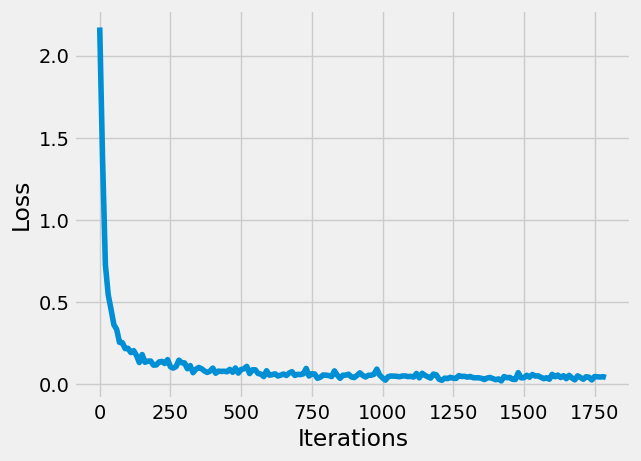

In [27]:
%%time 

###################
# Train the model # 
###################

losses = [] 
for epoch in range(n_epochs): 
    for k, (imgs, lbls) in enumerate(loader_train): 
        
        # Forward pass and loss
        network_outputs = model(imgs) # one prediction per image 
                                      # from the batch
        loss = loss_fun(network_outputs, lbls) # compare predictions 
                                               # and labels
        
        # Backward pass and parameter adjustment
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() # so as not to accumulate grads 
                              # between batches
        
        # Indicate progress
        if k%200 == 0: 
            print('Epoch %d, batch %d: loss = %.3f'%\
                  (epoch, k, loss.item()))
        losses.append(loss)
print()
        
##########################
# Plot (smoothed) losses #
##########################

win = 10

losses_values = [x.detach().numpy() for x in losses] # remove the 
                                            # computational graph 
                                            # from each tensor
losses_values = np.convolve(losses_values, 
                            np.ones(win), 
                            'valid')/win # rolling window average

iters = np.array(range(len(losses_values)))
losses_values = losses_values[::win]
iters = iters[::win] 

plt.figure()
plt.plot(iters, losses_values) 
plt.xlabel('Iterations')
plt.ylabel('Loss');


### Testing the simple convolutional neural network using pytorch

(Same as before) 


In [29]:
##################
# Test the model # 
##################

accuracy = 0 
with torch.no_grad(): 
    for imgs, lbls in loader_test:
        network_outputs = model(imgs)
        _, y_hats = torch.max(network_outputs, dim=1) # pick class 
                                                      # with maxinal 
                                                      # likelihood
        accuracy += (y_hats == lbls).sum().item()

accuracy = accuracy / len(loader_test.dataset)    
mystr = ' (yay!)' if accuracy>=0.95 else '' 
print('Accuracy = %.3f'%(accuracy), mystr)        

Accuracy = 0.988  (yay!)


### Summary

* **Design the model** (input, hidden layers, activation functions, output...) 
* **Create instances** of the:
    * Model
    * Loss function 
    * Optimizer
* **Train the model.** <br/> For each epoch: <br/> $ \hspace{8mm}$ For each sample or batch of samples: <br/> $ \hspace{16mm} \circ$ Forward pass (calculate predictions) <br/> $ \hspace{16mm} \circ$ Calculate loss <br/> $ \hspace{16mm} \circ$  Backward pass (calculate gradients) <br/> $ \hspace{16mm} \circ$ Optimizer step (update weights) <br/> $ \hspace{16mm} \circ$ (zero the gradients)
* **Test/evaluate the model** using a testing dataset that was set aside

